# Task 1: Exploratory Data Analysis (EDA)

## Objective
The objective of Task 1 is to perform an in-depth Exploratory Data Analysis (EDA) on the provided datasets: **Customers**, **Products**, and **Transactions**. The goal is to uncover meaningful insights that can drive business decisions. This analysis will focus on understanding customer behavior, product performance, and revenue trends across various dimensions.

## Steps Performed
1. **Loading and Cleaning Data**:  
   - Importing the datasets and ensuring data quality by checking for missing values, duplicates, and inconsistencies.  
   - Performing necessary transformations to standardize column formats for analysis.

2. **Descriptive Statistics**:  
   - Analyzing key metrics like total revenue, average transaction value, and customer lifetime value (CLV).  
   - Understanding the distribution of data across regions, products, and customer demographics.

3. **Data Visualization**:  
   - Using graphs such as bar charts, scatter plots, and histograms to visualize trends and patterns.  
   - Creating region-wise, product-wise, and month-wise revenue comparisons for actionable insights.

4. **Key Metrics and Insights**:  
   - Identifying high-value customers and their contribution to total revenue.  
   - Highlighting top-performing products and categories driving sales.  
   - Analyzing seasonal trends to understand peak transaction periods.  

## Deliverables
- A comprehensive EDA performed on all three datasets.  
- Identification of key business insights such as:  
  - Top customers contributing to revenue.  
  - Product categories with the highest sales.  
  - Seasonal trends and regional revenue performance.  
- Visualizations and summary statistics to support these findings.

In [57]:
import pandas as pd

# Load the datasets
customers_file = "C:\\Users\\Acer\\Downloads\\Customers.csv"
products_file = "C:\\Users\\Acer\\Downloads\\Products.csv"
transactions_file = "C:\\Users\\Acer\\Downloads\\Transactions.csv"

# Reading the CSV files into DataFrames
customers_df = pd.read_csv(customers_file)
products_df = pd.read_csv(products_file)
transactions_df = pd.read_csv(transactions_file)


In [58]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [59]:
products_df.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [60]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [61]:
# Checking shapes of the datasets
customers_shape = customers_df.shape
products_shape = products_df.shape
transactions_shape = transactions_df.shape
customers_shape, products_shape, transactions_shape

((200, 4), (100, 4), (1000, 7))

In [62]:
# 6. Identifying unique entries in categorical columns
unique_customers = customers_df['CustomerID'].nunique()
unique_products = products_df['ProductID'].nunique()
unique_transactions = transactions_df['TransactionID'].nunique()
print(unique_customers,unique_products,unique_transactions)

200 100 1000


In [63]:
# 4. Distribution of numerical columns (Transactions)
numerical_columns = transactions_df.select_dtypes(include='number')
numerical_distribution = numerical_columns.describe().T
print(numerical_distribution)

             count       mean         std    min      25%     50%      75%  \
Quantity    1000.0    2.53700    1.117981   1.00    2.000    3.00     4.00   
TotalValue  1000.0  689.99556  493.144478  16.08  295.295  588.88  1011.66   
Price       1000.0  272.55407  140.736390  16.08  147.950  299.93   404.40   

                max  
Quantity       4.00  
TotalValue  1991.04  
Price        497.76  


Customers Dataset (customers_df)
Contains information about customers, including CustomerID, CustomerName, Region, and SignupDate.

Products Dataset (products_df)
Contains details about products, such as ProductID, ProductName, Category, and Price.

Transactions Dataset (transactions_df)
Includes transaction details like TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, and Price.


In [64]:
# Display summary information of each DataFrame
print("\nCustomers DataFrame Info:")
customers_df.info()

print("\nProducts DataFrame Info:")
products_df.info()

print("\nTransactions DataFrame Info:")
transactions_df.info()


Customers DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

Products DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB

Transactions DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Colu

Next, I will perform 

Task 1: Exploratory Data Analysis (EDA), which involves:

1)Examining the structure and summary of the data.

2)Checking for missing or inconsistent data.

3)Generating visualizations and statistical summaries.

4)Extracting at least 5 actionable business insights.

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up plot style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [66]:
# Basic EDA: Checking for missing values
missing_customers = customers_df.isnull().sum()
missing_products = products_df.isnull().sum()
missing_transactions = transactions_df.isnull().sum()

# Print missing values for each DataFrame
print("Missing values in Customers DataFrame:\n", missing_customers)
print("\nMissing values in Products DataFrame:\n", missing_products)
print("\nMissing values in Transactions DataFrame:\n", missing_transactions)

Missing values in Customers DataFrame:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing values in Products DataFrame:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing values in Transactions DataFrame:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [67]:
# Statistical summaries for numerical columns
customers_summary = customers_df.describe(include="all")
products_summary = products_df.describe(include="all")
transactions_summary = transactions_df.describe()

# Print the statistical summaries
print("Customers DataFrame Summary:\n", customers_summary)
print("\nProducts DataFrame Summary:\n", products_summary)
print("\nTransactions DataFrame Summary:\n", transactions_summary)


Customers DataFrame Summary:
        CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3

Products DataFrame Summary:
        ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          Na

Initial Observations from EDA:

1)Missing Values: There are no missing values in any of the datasets, ensuring clean data for analysis.

2)Region Distribution:
South America has the highest number of customers (59).
Other regions include Europe (50), North America (46), and Asia (45).

3)Product Category Distribution:
Categories include Books (26), Electronics (26), Clothing (25), and Home Decor (23).

C:\Users\Acer\AppData\Local\Temp\ipykernel_55684\2603647702.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers_df, x='Region', order=region_distribution.index, palette="viridis")


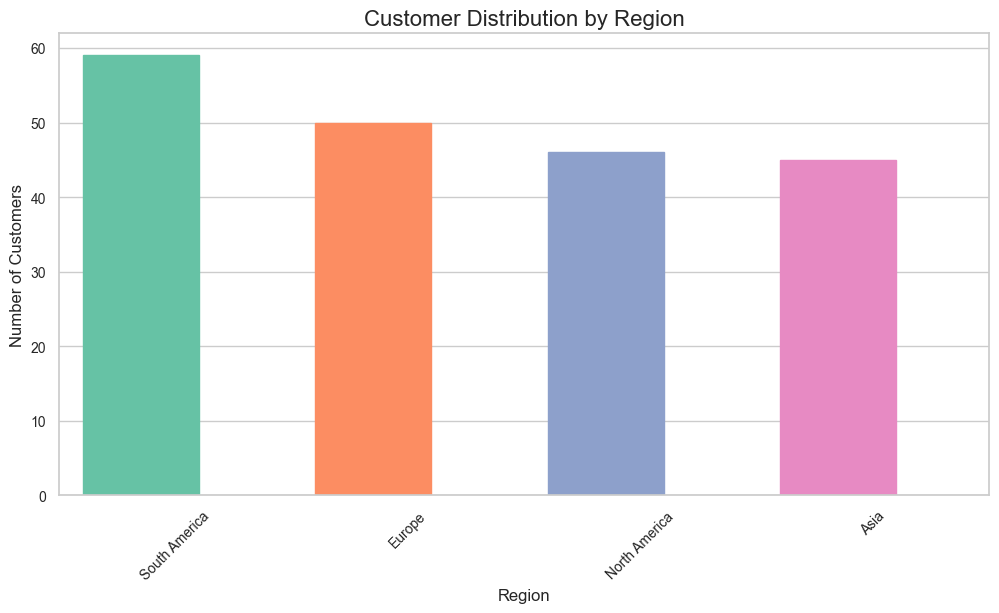

In [68]:
# Calculate the distribution of customers by region
region_distribution = customers_df['Region'].value_counts()

# Visualization: Customer distribution by region
sns.countplot(data=customers_df, x='Region', order=region_distribution.index, palette="viridis")
plt.title("Customer Distribution by Region", fontsize=16)
plt.xlabel("Region", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
colors = sns.color_palette("Set2", len(plt.gca().patches))
for bar, color in zip(plt.gca().patches, colors):
    bar.set_width(0.5)  # Change the width of each bar
    bar.set_color(color)  # Change the color of each bar
plt.ylabel("Number of Customers", fontsize=12)
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_55684\4156677606.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=products_df, y='Category', order=category_distribution.index, palette="magma")


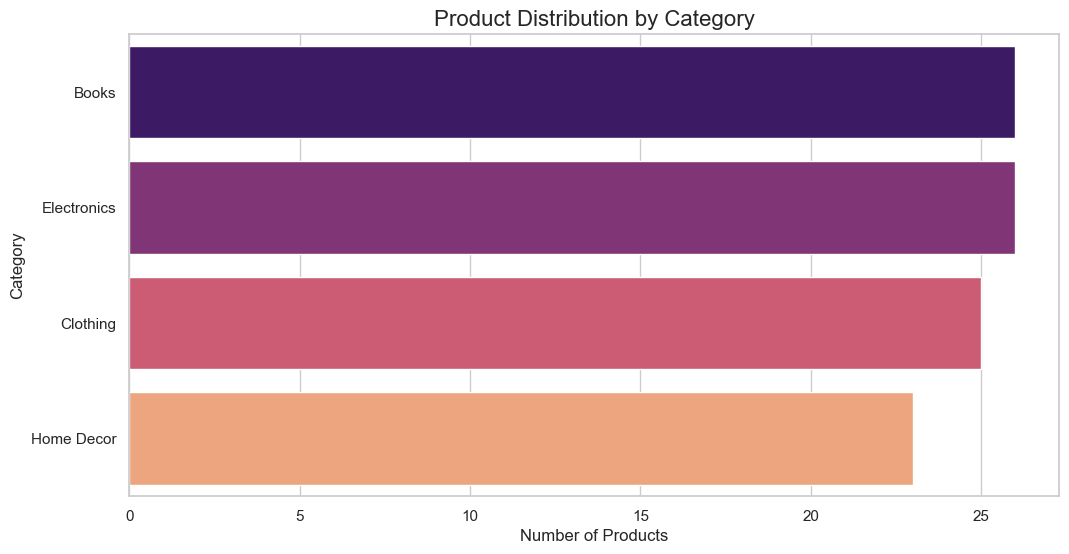

In [69]:
# Calculate the distribution of products by category
category_distribution = products_df['Category'].value_counts()

# Visualization: Product distribution by category
sns.countplot(data=products_df, y='Category', order=category_distribution.index, palette="magma")
plt.title("Product Distribution by Category", fontsize=16)
plt.xlabel("Number of Products", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.show()

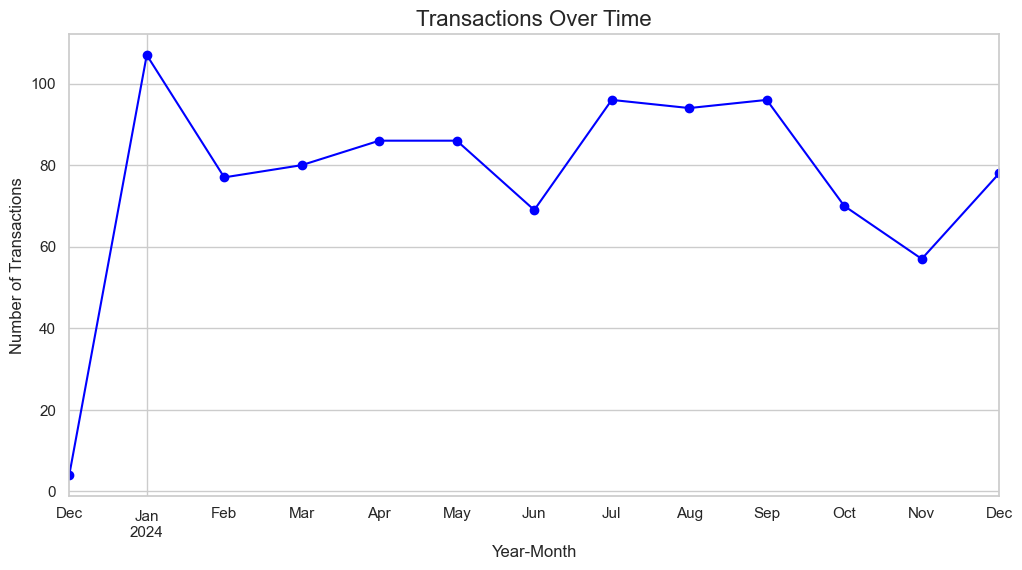

In [70]:
# Transactions over time: Parsing TransactionDate
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['YearMonth'] = transactions_df['TransactionDate'].dt.to_period('M')

# Plotting transactions over time
transactions_over_time = transactions_df['YearMonth'].value_counts().sort_index()
transactions_over_time.plot(kind='line', marker='o', color='blue')
plt.title("Transactions Over Time", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.grid(True)
plt.show()

In [71]:
# Business Insights
# 1. Top Customers by Transaction Value
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

print("Top Customers by Transaction Value", top_customers)


Top Customers by Transaction Value CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [72]:
# 1. Top Customers by Transaction Value
top_customers = transactions_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)

print("Top Customers by Transaction Value (Top 10):\n", top_customers)

Top Customers by Transaction Value (Top 10):
 CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [73]:
# 2. Most Popular Products by Quantity Sold
popular_products = transactions_df.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
popular_products_names = products_df.set_index('ProductID').loc[popular_products.index, 'ProductName']
print("Most Popular Products by Quantity Sold (Top 10):\n", popular_products_names)



Most Popular Products by Quantity Sold (Top 10):
 ProductID
P059          SoundWave Jeans
P054       SoundWave Cookbook
P029       TechPro Headphones
P079           ActiveWear Rug
P061      HomeSense Desk Lamp
P057    ActiveWear Smartphone
P048         TechPro Cookbook
P062          HomeSense Novel
P020        ActiveWear Jacket
P028      HomeSense Desk Lamp
Name: ProductName, dtype: object


In [74]:
# 3. Revenue Contribution by Region
revenue_by_region = transactions_df.merge(customers_df, on='CustomerID') \
                                   .groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

print("Revenue Contribution by Region:\n", revenue_by_region)

Revenue Contribution by Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [75]:
# 4. Category-Wise Revenue
revenue_by_category = transactions_df.merge(products_df, on='ProductID') \
                                     .groupby('Category')['TotalValue'].sum().sort_values(ascending=False)

print("Revenue by Category:\n", revenue_by_category)

Revenue by Category:
 Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


In [76]:
# 5. Signup Trends
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
signup_trends = customers_df['SignupDate'].dt.to_period('M').value_counts().sort_index()

print("Signup Trends Over Time:\n", signup_trends)

Signup Trends Over Time:
 SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64


In [77]:
# Previewing Key Results
{
    "Top Customers by Transaction Value": top_customers,
    "Most Popular Products": popular_products_names,
    "Revenue by Region": revenue_by_region,
    "Revenue by Category": revenue_by_category,
    "Signup Trends": signup_trends
}

{'Top Customers by Transaction Value': CustomerID
 C0141    10673.87
 C0054     8040.39
 C0065     7663.70
 C0156     7634.45
 C0082     7572.91
 C0188     7111.32
 C0059     7073.28
 C0028     6819.57
 C0099     6715.72
 C0165     6708.10
 Name: TotalValue, dtype: float64,
 'Most Popular Products': ProductID
 P059          SoundWave Jeans
 P054       SoundWave Cookbook
 P029       TechPro Headphones
 P079           ActiveWear Rug
 P061      HomeSense Desk Lamp
 P057    ActiveWear Smartphone
 P048         TechPro Cookbook
 P062          HomeSense Novel
 P020        ActiveWear Jacket
 P028      HomeSense Desk Lamp
 Name: ProductName, dtype: object,
 'Revenue by Region': Region
 South America    219352.56
 Europe           166254.63
 North America    152313.40
 Asia             152074.97
 Name: TotalValue, dtype: float64,
 'Revenue by Category': Category
 Books          192147.47
 Electronics    180783.50
 Clothing       166170.66
 Home Decor     150893.93
 Name: TotalValue, dtype: float

In [78]:
# 1. Customer Lifetime Value (CLV)
# Calculating total revenue per customer and average transaction value
customer_revenue = transactions_df.groupby('CustomerID')['TotalValue'].sum()
avg_transaction_value = transactions_df.groupby('CustomerID')['TotalValue'].mean()

# Combining metrics into a single DataFrame
customer_clv = pd.DataFrame({
    "TotalRevenue": customer_revenue,
    "AvgTransactionValue": avg_transaction_value,
    "TransactionCount": transactions_df['CustomerID'].value_counts()
})
customer_clv['CLV'] = customer_clv['TotalRevenue'] * customer_clv['TransactionCount']

# Print the results
print("Customer Lifetime Value (CLV):\n", customer_clv)

Customer Lifetime Value (CLV):
             TotalRevenue  AvgTransactionValue  TransactionCount       CLV
CustomerID                                                               
C0001            3354.52           670.904000                 5  16772.60
C0002            1862.74           465.685000                 4   7450.96
C0003            2725.38           681.345000                 4  10901.52
C0004            5354.88           669.360000                 8  42839.04
C0005            2034.24           678.080000                 3   6102.72
...                  ...                  ...               ...       ...
C0196            4982.88          1245.720000                 4  19931.52
C0197            1928.65           642.883333                 3   5785.95
C0198             931.83           465.915000                 2   1863.66
C0199            1979.28           494.820000                 4   7917.12
C0200            4758.60           951.720000                 5  23793.00

[199 

In [79]:
# 2. Product Performance Analysis
# Merging transaction data with product data for detailed analysis
product_performance = transactions_df.merge(products_df, on='ProductID')
category_performance = product_performance.groupby('Category')[['TotalValue', 'Quantity']].sum()
product_revenue = product_performance.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False)
print("Category Performance:\n", category_performance)
print("\nTop Products by Revenue:\n", product_revenue.head(10))

Category Performance:
              TotalValue  Quantity
Category                         
Books         192147.47       681
Clothing      166170.66       590
Electronics   180783.50       627
Home Decor    150893.93       639

Top Products by Revenue:
 ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


In [80]:
# 3. Region-Wise Customer Analysis
# Analyzing average revenue per customer by region
customer_region_revenue = transactions_df.merge(customers_df, on='CustomerID') \
                                         .groupby('Region')['TotalValue'].mean()

# Print the results
print("Average Revenue per Customer by Region:\n", customer_region_revenue)

Average Revenue per Customer by Region:
 Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64


In [81]:
# 4. Monthly Revenue Growth
# Calculating monthly revenue and identifying growth trends
monthly_revenue = transactions_df.groupby(transactions_df['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthly_growth_rate = monthly_revenue.pct_change().fillna(0)

# Print the results
print("Monthly Revenue:\n", monthly_revenue)
print("\nMonthly Growth Rate:\n", monthly_growth_rate)

Monthly Revenue:
 TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64

Monthly Growth Rate:
 TransactionDate
2023-12     0.000000
2024-01    16.608711
2024-02    -0.224735
2024-03    -0.070552
2024-04     0.202605
2024-05     0.121850
2024-06    -0.244183
2024-07     0.463290
2024-08    -0.111112
2024-09     0.112979
2024-10    -0.333418
2024-11    -0.187808
2024-12     0.544805
Freq: M, Name: TotalValue, dtype: float64


In [82]:
# Previewing Key Results
advanced_analysis_results = {
    "Customer Lifetime Value (CLV)": customer_clv.head(10),
    "Category Performance": category_performance,
    "Top Products by Revenue": product_revenue.head(10),
    "Region-Wise Average Revenue": customer_region_revenue,
    "Monthly Revenue and Growth Rate": monthly_growth_rate
}
advanced_analysis_results

{'Customer Lifetime Value (CLV)':             TotalRevenue  AvgTransactionValue  TransactionCount       CLV
 CustomerID                                                               
 C0001            3354.52           670.904000                 5  16772.60
 C0002            1862.74           465.685000                 4   7450.96
 C0003            2725.38           681.345000                 4  10901.52
 C0004            5354.88           669.360000                 8  42839.04
 C0005            2034.24           678.080000                 3   6102.72
 C0006            4227.57          1056.892500                 4  16910.28
 C0007            2579.82           859.940000                 3   7739.46
 C0008            4271.61           427.161000                10  42716.10
 C0009             896.50           298.833333                 3   2689.50
 C0010            1717.55           429.387500                 4   6870.20,
 'Category Performance':              TotalValue  Quantity
 Catego

<function matplotlib.pyplot.show(close=None, block=None)>

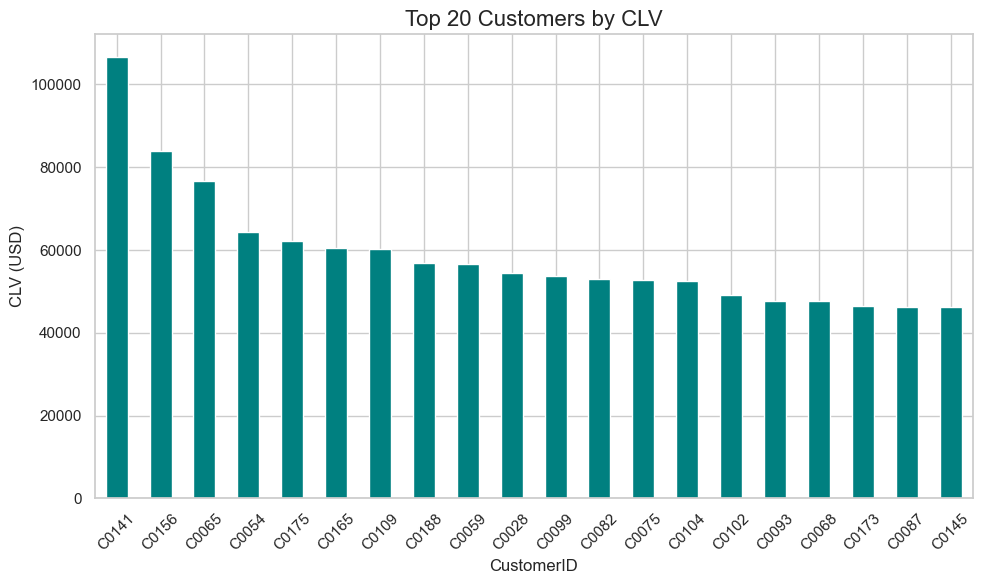

In [83]:
import matplotlib.pyplot as plt


# Plotting Visualizations

# 1. Customer Lifetime Value (CLV) Distribution
plt.figure(figsize=(10, 6))
customer_clv['CLV'].sort_values(ascending=False).head(20).plot(kind='bar', color='teal')
plt.title("Top 20 Customers by CLV", fontsize=16)
plt.xlabel("CustomerID", fontsize=12)
plt.ylabel("CLV (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

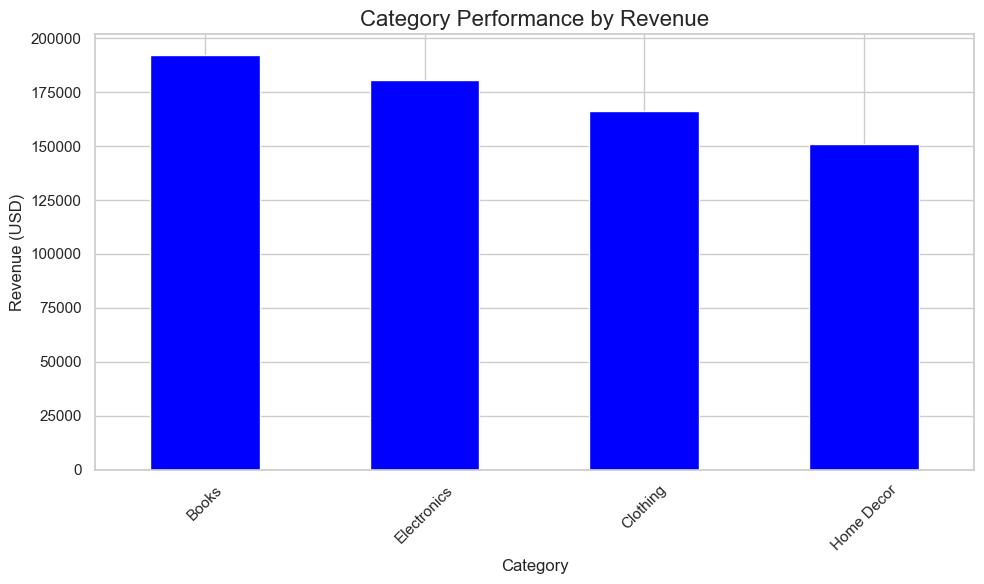

In [84]:
# 2. Category Performance (Revenue)
plt.figure(figsize=(10, 6))
category_performance['TotalValue'].sort_values(ascending=False).plot(kind='bar', color='blue')
plt.title("Category Performance by Revenue", fontsize=16)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Revenue (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

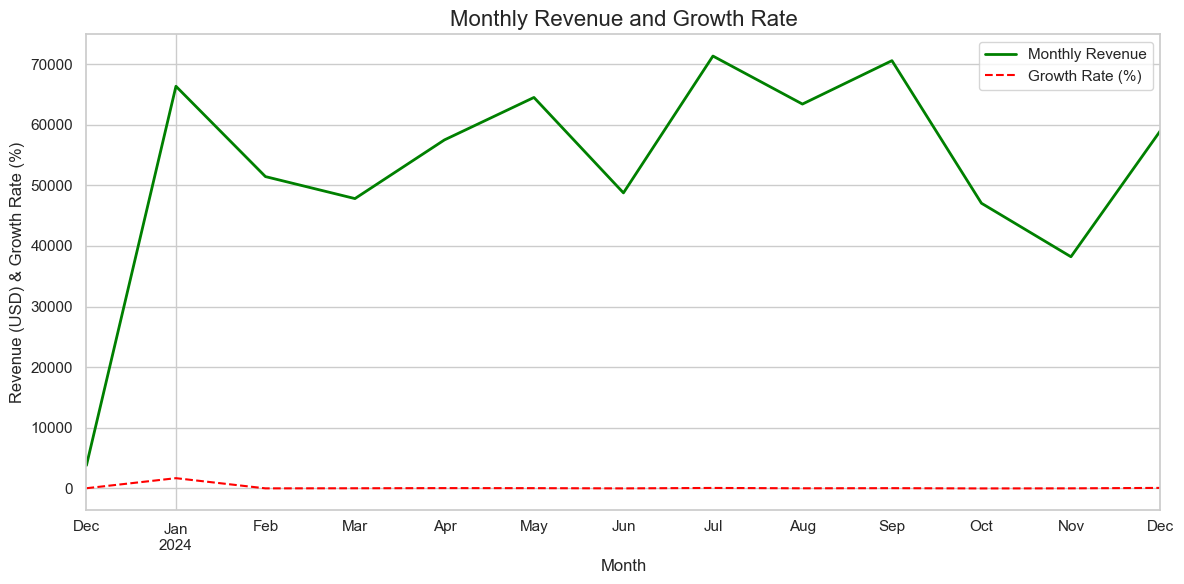

In [85]:
# 3. Monthly Revenue and Growth Rate
plt.figure(figsize=(12, 6))
monthly_revenue.plot(color='Green', label='Monthly Revenue', linewidth=2)
(monthly_growth_rate * 100).plot(color='red', linestyle='--', label='Growth Rate (%)')
plt.title("Monthly Revenue and Growth Rate", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue (USD) & Growth Rate (%)", fontsize=12)
plt.legend()
plt.tight_layout()
plt.show 